In [82]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [83]:
with open('몬스터에너지울트라_최종.json') as json_file:
    json_data = json.load(json_file)

In [84]:
df = pd.DataFrame(json_data['data'])

In [85]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,"[🔖 200129\n#몬스터에너지 #몬스터에너지울트라\n\n카페인 없으면 좀비지만,...","[몬스터에너지, 몬스터에너지울트라, 박카스, 에너지드링크]",[],2020년 7월 27일,[164]
1,1,[마..퇴근했으믄\n한잔 쭉빨고 운동가야제.. D-8\n#포항 #퇴근 #헬스 #몬스...,"[포항, 퇴근, 헬스, 몬스터에너지울트라, 프로틴바, 운동, 일상, 운동하는남자, ...",[포항 영일대해수욕장],2019년 10월 5일,[261]
2,2,[.\n.\n몬스터에너지는 하루에 하나만 먹읍니다.\n잠을 못잤는데 화장은 굿뜨 !...,"[불금, 피곤, 몬스터에너지, 몬스터에너지울트라, 화장, 굳뜨, 인스타데일리, 인스...","[Seoul, Korea]",2019년 9월 27일,[229]
3,3,[째려 보는거 아닙니당 🤨\n햇빛이 너무 쌔서 눈을 못뜨겠..ㅋㅋㅋ🌞\n#몬스터에너...,"[몬스터에너지, 비키니, 촬영, 물놀이, 몬스터즈_민강사, 오늘도몬스터, Monst...",[],2018년 7월 23일,"[2,019]"
4,4,[Just some chill.😎🍹🥃 .\n.#몬스터에너지드링크#몬스터에너지#몬스터...,"[몬스터에너지드링크, 몬스터에너지, 몬스터에너지와함께, 몬스터, 에너지드링크, 몬스...",[Yeet],2019년 12월 14일,[114]
...,...,...,...,...,...,...
1298,1298,[우왕 편의점에 딱하나잇던 몬스터 울트라 !! 여러종류몬스터 먹어봤는대 이건첨보네\...,"[의정부, 출근, 일요일, 몬스터, 울트라, 몬스터울트라, 버팀목]",[],2016년 5월 29일,[7]
1299,1299,[몬스터에너지 울트라~!\n편의점에서 발견^^\n칼로리도 낮고.컷팅때 부스터겸 마셔...,"[몬스터에너지, 몬스터울트라, 헬스, 1, 개인레슨, pt, 의정부pt, 운동, 다...",[],2016년 5월 29일,[59]
1300,1300,[#몬스터울트라 #새로운맛 #불금 이 밤 불질러 봅시다.],"[몬스터울트라, 새로운맛, 불금]",[],2016년 5월 27일,[14]
1301,1301,[몬스터 울트라!! 새로나왔나봄! 마이쩡 #몬스터울트라 #monster #ultra],"[몬스터울트라, monster, ultra]",[],2015년 7월 30일,[9]


# Hashtags 분석

# 1. Word Cloud

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [87]:
tags = [element for array in list(df.Hashtags) for element in array]

In [88]:
tags[0:5]

['몬스터에너지', '몬스터에너지울트라', '박카스', '에너지드링크', '포항']

In [89]:
monsteru_stop_words = ['error','몬스터에너지','몬스터', '에너지','monsterenergy', '에너지드링크','박카스','비타500'\
                     , '몬스터에너지울트라', '캔구루', '핫식스', '레드불', '비타500', '카페인대신비타500', '카페인대신비타500	'\
                     '건강한비타민c', 'redbull','건강한비타민c', '카페인대신비타500','몬스터울트라','monster',\
                      'monsterenergyultra']

In [90]:
cv = CountVectorizer(max_features=10000, stop_words = monsteru_stop_words)

In [91]:
tdm = cv.fit_transform(tags)

In [92]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [93]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
4687,일상,184
1978,다이어트,116
4012,에너지음료,100
257,daily,98
4341,운동,90


In [94]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [95]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

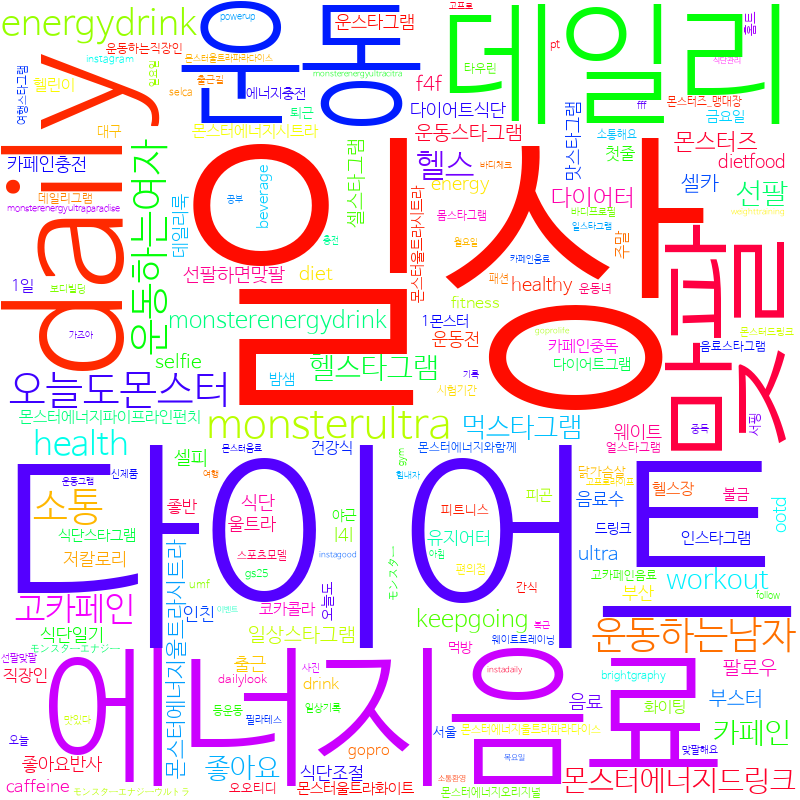

In [96]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [97]:
tdm.shape

(15523, 6293)

In [98]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [99]:
words = cv.get_feature_names()

In [100]:
tokens = tags

In [101]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 3.55 s


In [102]:
from sklearn.decomposition import TruncatedSVD

In [103]:
svd = TruncatedSVD(n_components=1000)

In [104]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [105]:
svd.components_.shape

(1000, 6293)

In [106]:
word_emb = svd.components_.T

In [107]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 4687
다이어트 1978
에너지음료 4012
daily 257
운동 4341
데일리 2131
맞팔 2482
monsterultra 640
오늘도몬스터 4162
운동하는여자 4394
소통 3453
운동하는남자 4388
energydrink 320
고카페인 1408
health 449
헬스 6059
카페인 5365
몬스터에너지드링크 2631
헬스타그램 6075
선팔 3386
좋아요 4988
먹스타그램 2537
workout 919
다이어터 1974
monsterenergydrink 619
몬스터즈 2685
몬스터울트라 1004
keepgoing 535
몬스터에너지울트라시트라 2651
셀카 3425
운동스타그램 1060
일상스타그램 4696
건강 943
메모장 994
운동일기 1061
매일 988
건강그램 944
운동스타그램 4363
운동일지 1062
운동 1059
운동후 1066
헬스타그램 1121
헬스 1119
웨이트 1068
f4f 337
셀스타그램 3424
부스터 3083
팔로우 5670
selfie 779
diet 279
ultra 872
선팔하면맞팔 3390
음료 4524
셀피 3432
식단 3651
유지어터 4496
인친 4659
ootd 701
부산 3070
음료수 4527
다이어트식단 1994
출근 5292
healthy 451
energy 319
맛스타그램 2458
울트라 4422
식단조절 3659
웨이트 4468
데일리룩 2134
운스타그램 4407
l4l 553
좋아요반사 4992
식단일기 3658
dietfood 284
운동전 4376
저칼로리 4859
카페인충전 5390
첫줄 5216
직장인 5109
caffeine 209
좋반 4985
몬스터에너지시트라 2639
fitness 362
주말 5008
몬스터에너지파이프라인펀치 2661
헬린이 6052
drink 303
건강식 1311
카페인중독 5385
헬스장 

In [108]:
word_emb = svd.components_.T

In [109]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [110]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 3min 26s


103

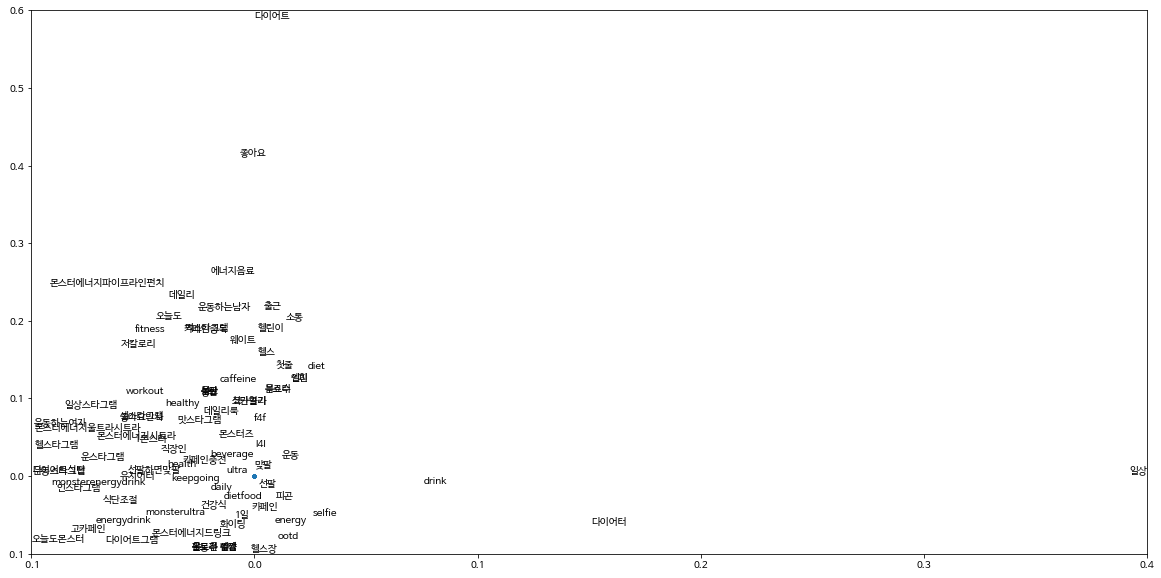

In [111]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

pyplot.xlim(-0.1, 0.4)
pyplot.ylim(-0.1, 0.6)

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [112]:
from sklearn.manifold import TSNE

In [113]:
tsne = TSNE()

In [114]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 10min 58s


159

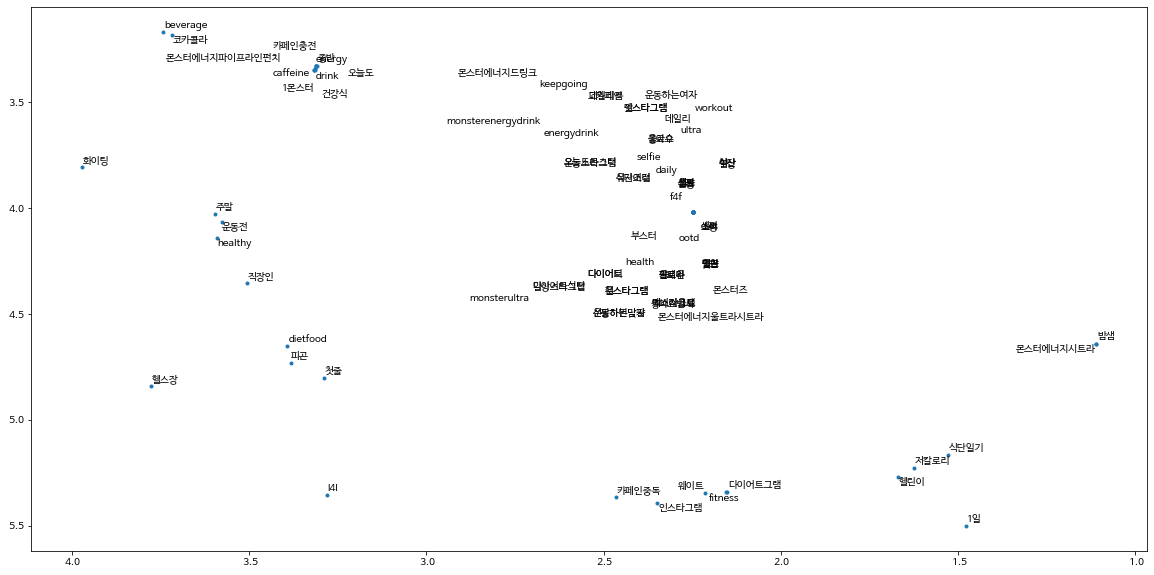

In [115]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [116]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [117]:
sentences = list(df['Hashtags'])

In [120]:
model = Word2Vec(sentences, size = 1000, min_count = 10, workers = 4, window = 100) # negative, sg

In [121]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [122]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [123]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

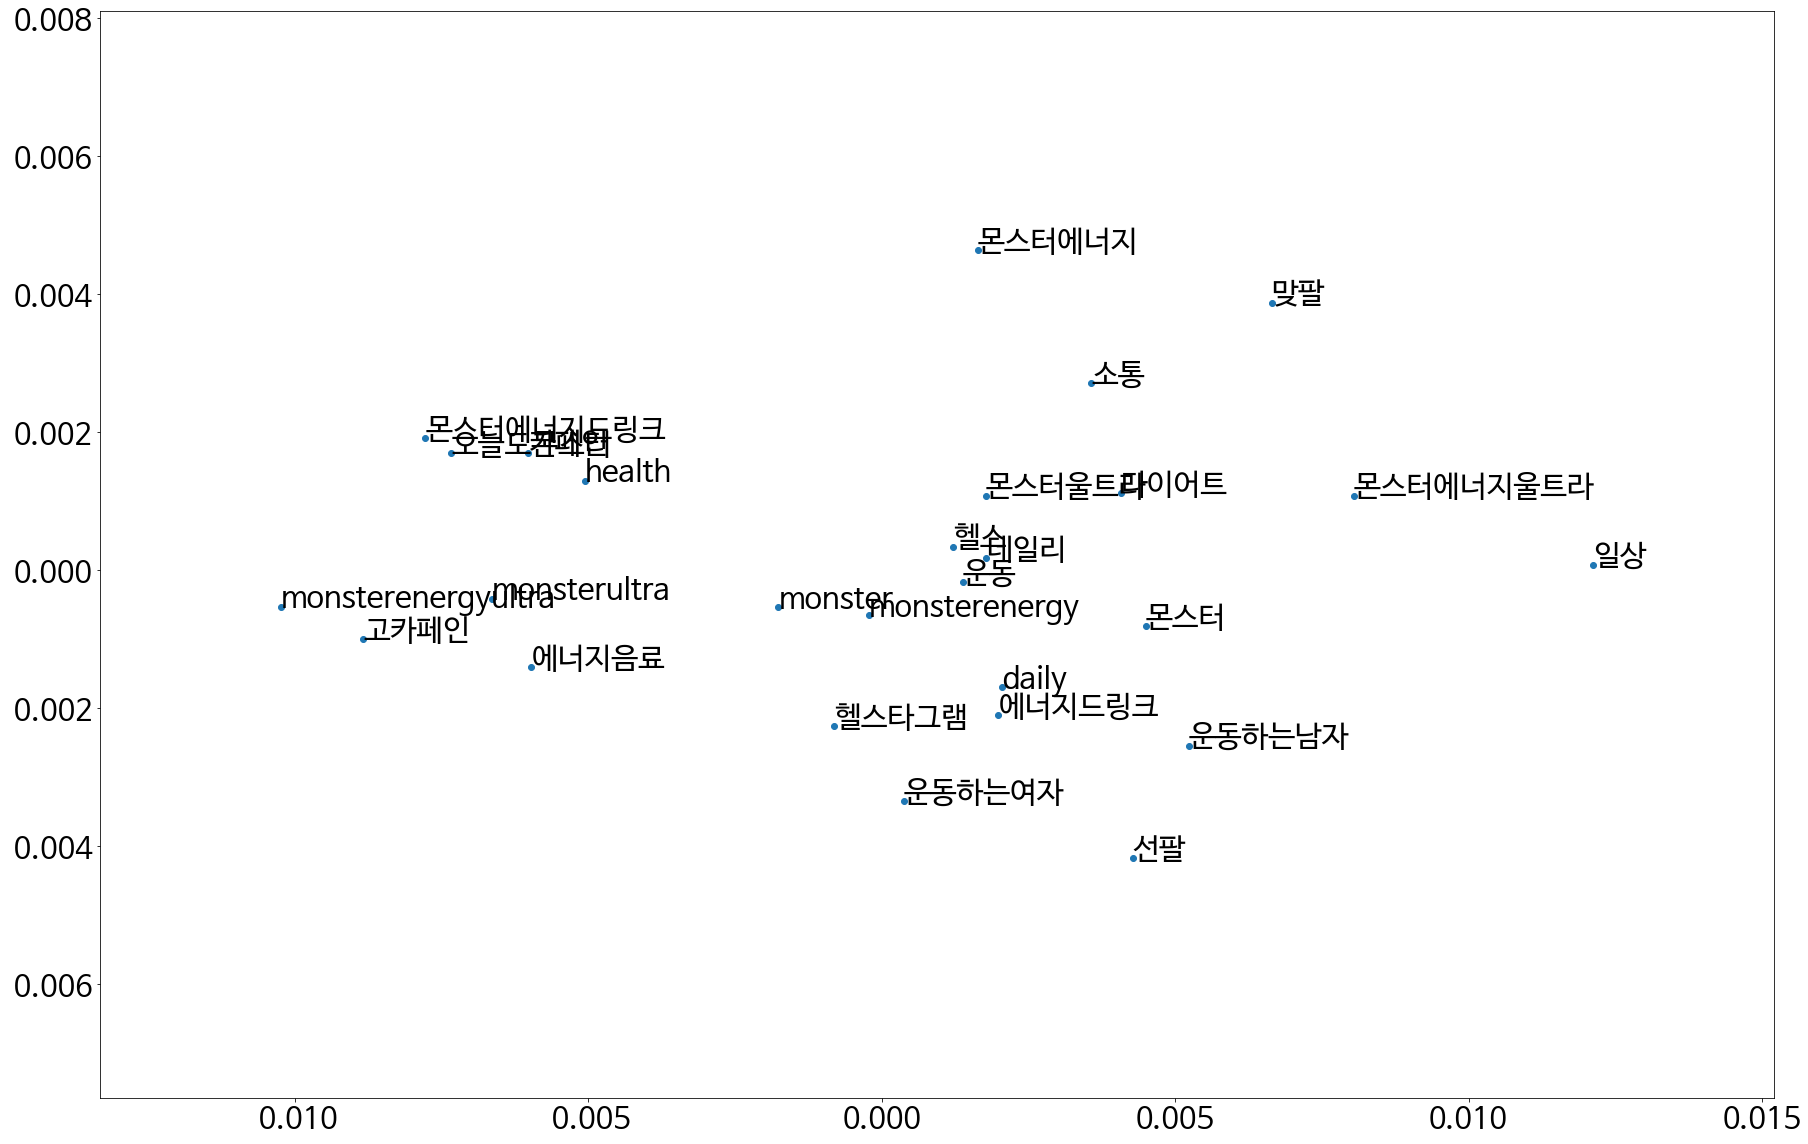

In [124]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [62]:
locates = [element for array in list(df.Locates) for element in array]

In [63]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [64]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
108,seoul,30
19,busan,14
116,station,9
73,incheon,7
299,우리집,7


In [65]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [66]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

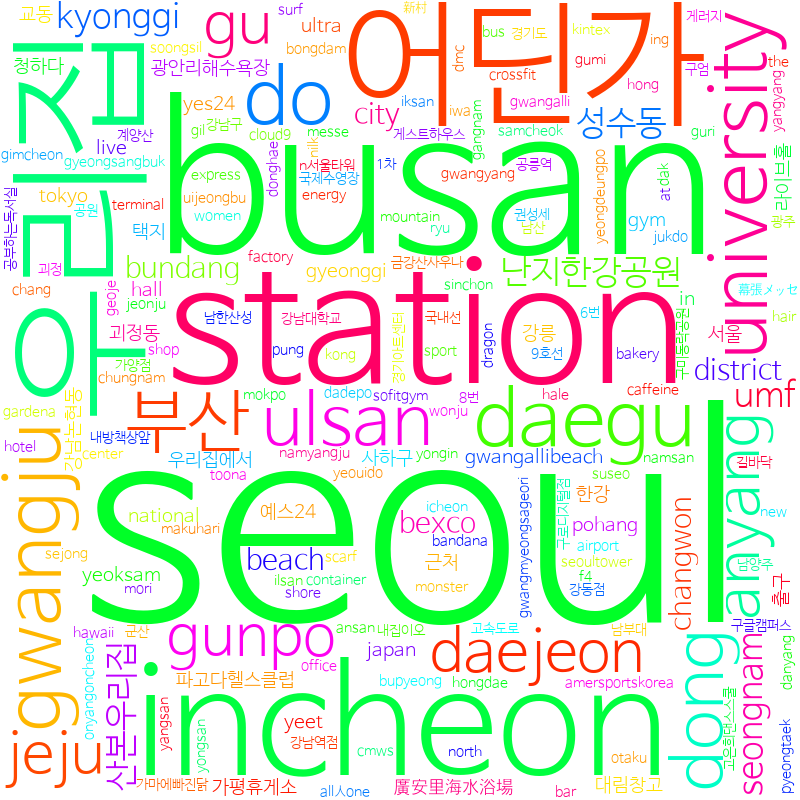

In [67]:
cloud.to_image()

## - Embedding

- LSA

In [68]:
tdm.shape

(341, 395)

In [69]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [70]:
words = cv.get_feature_names()
tokens = locates

In [71]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 5.98 ms


In [75]:
%%time
svd = TruncatedSVD(n_components=tdm.shape[1] - 1)
svd.fit(tdm)

Wall time: 241 ms


TruncatedSVD(algorithm='randomized', n_components=394, n_iter=5,
             random_state=None, tol=0.0)

In [76]:
svd.components_.shape

(341, 395)

In [77]:
word_emb = svd.components_.T

In [78]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 108
busan 19
station 116
incheon 73
우리집 299
어딘가 290
university 127
gwangju 56
do 37
daegu 31
ulsan 124
dong 38
부산 231
난지한강공원 177
성수동 258
산본우리집 240
gunpo 52
gu 50
jeju 77
daejeon 32
kyonggi 82
seongnam 107
anyang 8
umf 126
사하구 239
강릉 150
yes24 136
changwon 23
gwangallibeach 55
ultra 125
pohang 100
gyeonggi 59
gym 61
hall 64
yeet 132
출구 345
근처 174
in 72
예스24 298
청하다 342
japan 76
yeoksam 133
national 92
광안리해수욕장 161
우리집에서 300
live 83
괴정동 164
택지 358
교동 165
bundang 16
강남논현동 146
district 35
파고다헬스클럽 361
tokyo 121
bexco 14
라이브홀 200
서울 247
가평휴게소 144
beach 13
대림창고 190
廣安里海水浴場 140
city 25
한강 377
연수구 294
어딘가에서 291
신림동 276
에덴벨리 292
시간의 275
신촌 277
영일대해수욕장 295
예술체육대학 296
여의도 293
양재동어딘가 287
아델라인필라테스 278
아울렛 279
안국사 280
안동휴게소 281
안하고 282
애진봉 283
어느곳 289
스터디플래닛 274
양천구 288
양양 285
예술회관역 297
양재 286
양산이마트 284
1차 0
스타짐 273
서울도봉우체국 248
서브웨이 245
새마을휘트니스슈퍼비용인점 244
새마을휘트니스노원점 243
상업지구 242
삼성동 241
사보이시티 238
빌딩 237
비블리스커피 236
브라운핸즈 235
불광동 234
분당구 233


In [79]:
word_emb = svd.components_.T

In [80]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 3min 8s


360

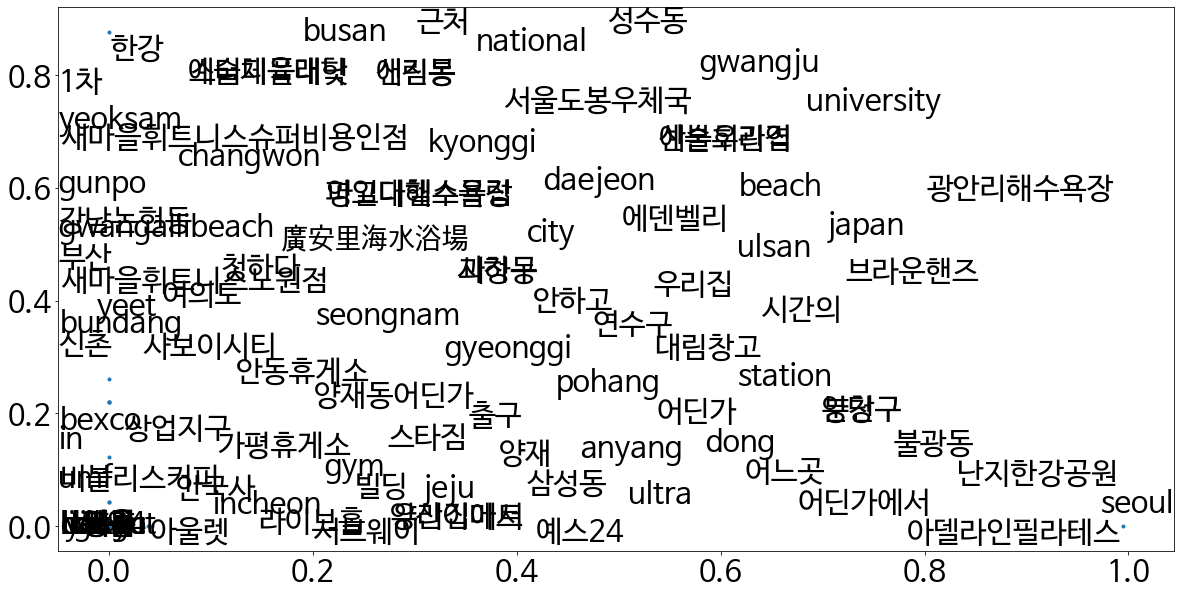

In [81]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [ ]:
tsne = TSNE()

In [ ]:
%%time
pos = tsne.fit_transform(word_emb)

In [ ]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [ ]:
sentences = list(df['Locates'])

In [ ]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [ ]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [ ]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))